In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400

In [3]:
df= pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df['LIMIT_BAL'],df['default payment next month']

(0         20000
 1        120000
 2         90000
 3         50000
 4         50000
           ...  
 26659    220000
 26660    150000
 26661     30000
 26662     80000
 26663     50000
 Name: LIMIT_BAL, Length: 26664, dtype: int64, 0        1
 1        1
 2        0
 3        0
 4        0
         ..
 26659    0
 26660    0
 26661    1
 26662    1
 26663    1
 Name: default payment next month, Length: 26664, dtype: int64)

In [5]:
X=df['LIMIT_BAL'].values.reshape(-1,1)
y=df['default payment next month'].values

In [6]:
X

array([[ 20000],
       [120000],
       [ 90000],
       ...,
       [ 30000],
       [ 80000],
       [ 50000]], dtype=int64)

In [7]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [10]:
log_model=LogisticRegression()
log_model.solver='lbfgs'

In [11]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

____________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**

In [12]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

____________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**

In [13]:
y_pred=log_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
y_pred_prob=log_model.predict_proba(X_test)
y_pred_prob

array([[0.85704879, 0.14295121],
       [0.83932616, 0.16067384],
       [0.6343848 , 0.3656152 ],
       ...,
       [0.82981809, 0.17018191],
       [0.69563796, 0.30436204],
       [0.85704879, 0.14295121]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [15]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve

In [16]:
roc_auc_score(y_test,y_pred_prob[:,1])

0.6170050717511655

_________________________________________________________________________
**Now, plot the ROC curve.**


In [17]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob[:,1])

Text(0.5, 1.0, 'ROC curve')

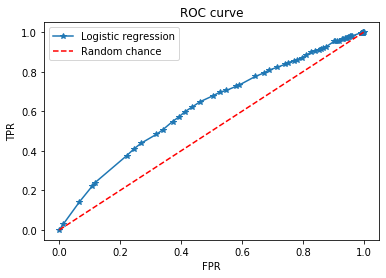

In [18]:
plt.plot(fpr,tpr,'*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic regression','Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')


In [19]:
threshold

array([1.48278573, 0.48278573, 0.46561223, 0.44851986, 0.43154824,
       0.41473586, 0.39811974, 0.38173512, 0.3656152 , 0.34979087,
       0.33429053, 0.31913993, 0.30436204, 0.289977  , 0.2760021 ,
       0.26245174, 0.24933753, 0.23666834, 0.2244504 , 0.21268747,
       0.20138094, 0.19053   , 0.18013187, 0.17018191, 0.16067384,
       0.15159994, 0.14295121, 0.13471753, 0.12688789, 0.11945047,
       0.11239288, 0.10570222, 0.09936526, 0.09336855, 0.0876985 ,
       0.0823415 , 0.07728401, 0.07251262, 0.06801408, 0.06377544,
       0.059784  , 0.05602743, 0.05249372, 0.04917127, 0.04604889,
       0.0431158 , 0.04036162, 0.03777643, 0.03535072, 0.03307542,
       0.03094187, 0.02894182, 0.02706745, 0.0253113 , 0.02366632,
       0.02212582, 0.02068347, 0.01933329, 0.01806961, 0.01688712,
       0.0147458 , 0.01377776, 0.01049441, 0.00915615, 0.00798717,
       0.00745946, 0.00402682])

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [20]:
precision,recall,threshold1=precision_recall_curve(y_test,y_pred_prob[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision and Recall curve')

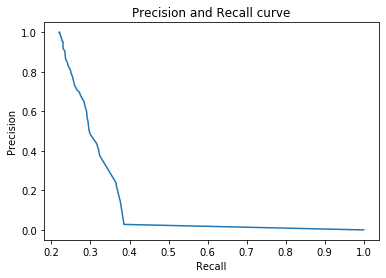

In [21]:
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and Recall curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [22]:
from sklearn.metrics import auc
auc(recall,precision)

0.3147009000933155

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [23]:
xtrain_pred=log_model.predict(X_train)
xtrain_pred_prob=log_model.predict_proba(X_train)
xtrain_pred_prob

array([[0.58526414, 0.41473586],
       [0.61826488, 0.38173512],
       [0.79861906, 0.20138094],
       ...,
       [0.7755496 , 0.2244504 ],
       [0.75066247, 0.24933753],
       [0.79861906, 0.20138094]])

In [24]:
roc_auc_score(y_train,xtrain_pred_prob[:,1])

0.6193668918916676

    How is this different, conceptually and quantitatively, from your earlier calculation?
